In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Even though the Target Variable has integer data type but still it is categorical in nature, therefore it is classification problem.

In [8]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [9]:
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

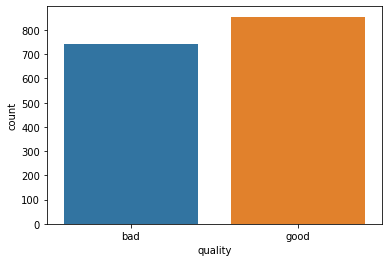

In [10]:
sns.countplot(data['quality'])

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['quality'] = enc.fit_transform(data['quality'])

data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

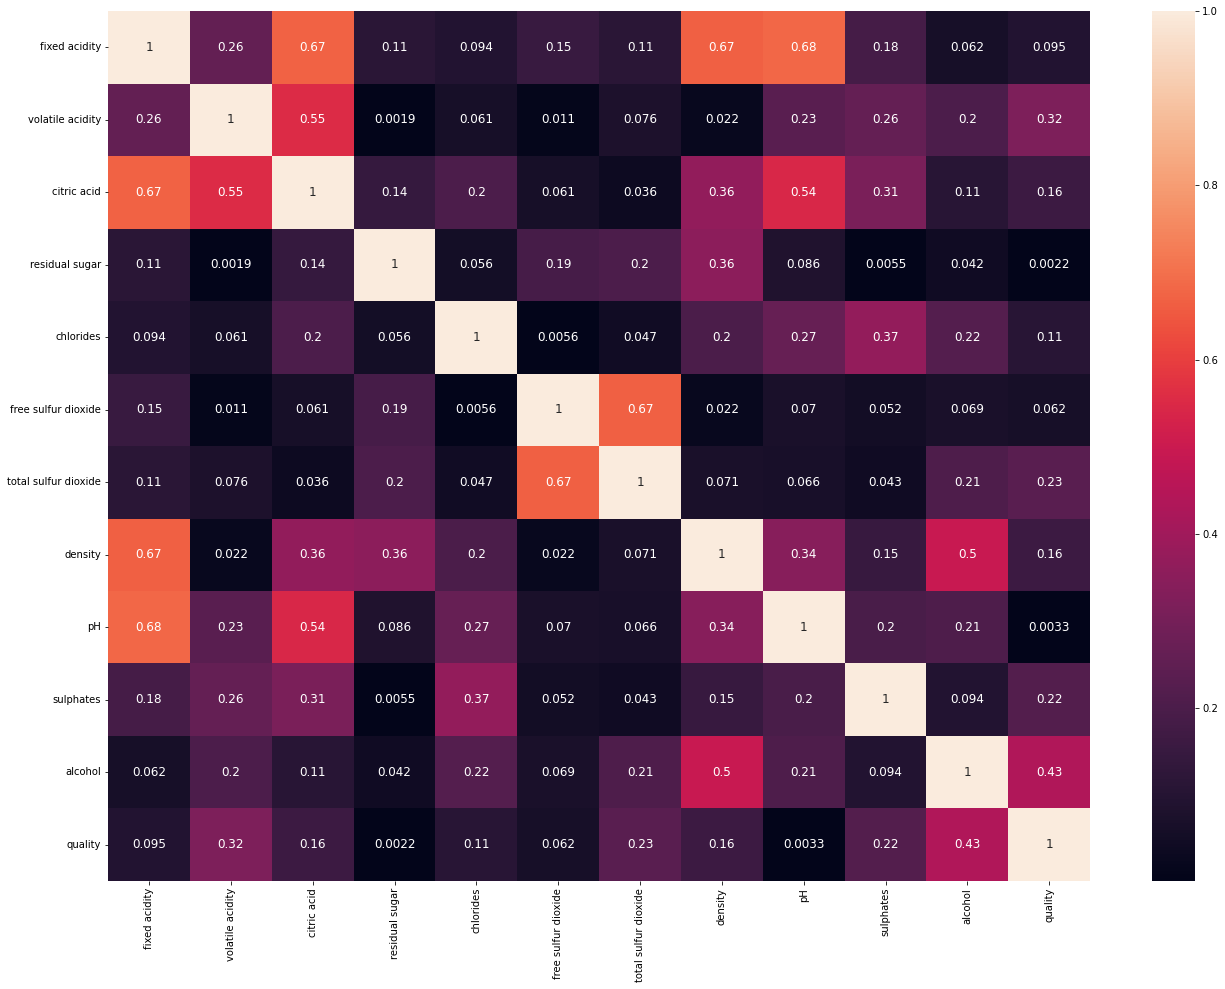

In [12]:
data_corr = data.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

There seems to be no strong correlation between the independent variables. let's check the same using VIF.

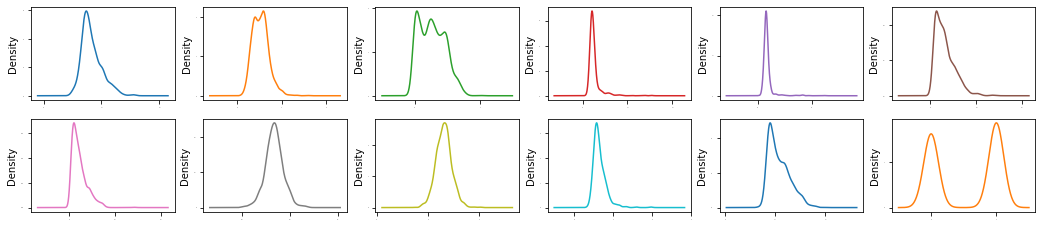

In [13]:
data.plot(kind = 'density', subplots = True, sharex = False, figsize = (18,12), layout = (6,6), fontsize=1, legend = False)

plt.show()

There seems to be some skewness in the data. 

In [14]:
x = data.drop(columns = 'quality')
y = data.quality

In [15]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [16]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

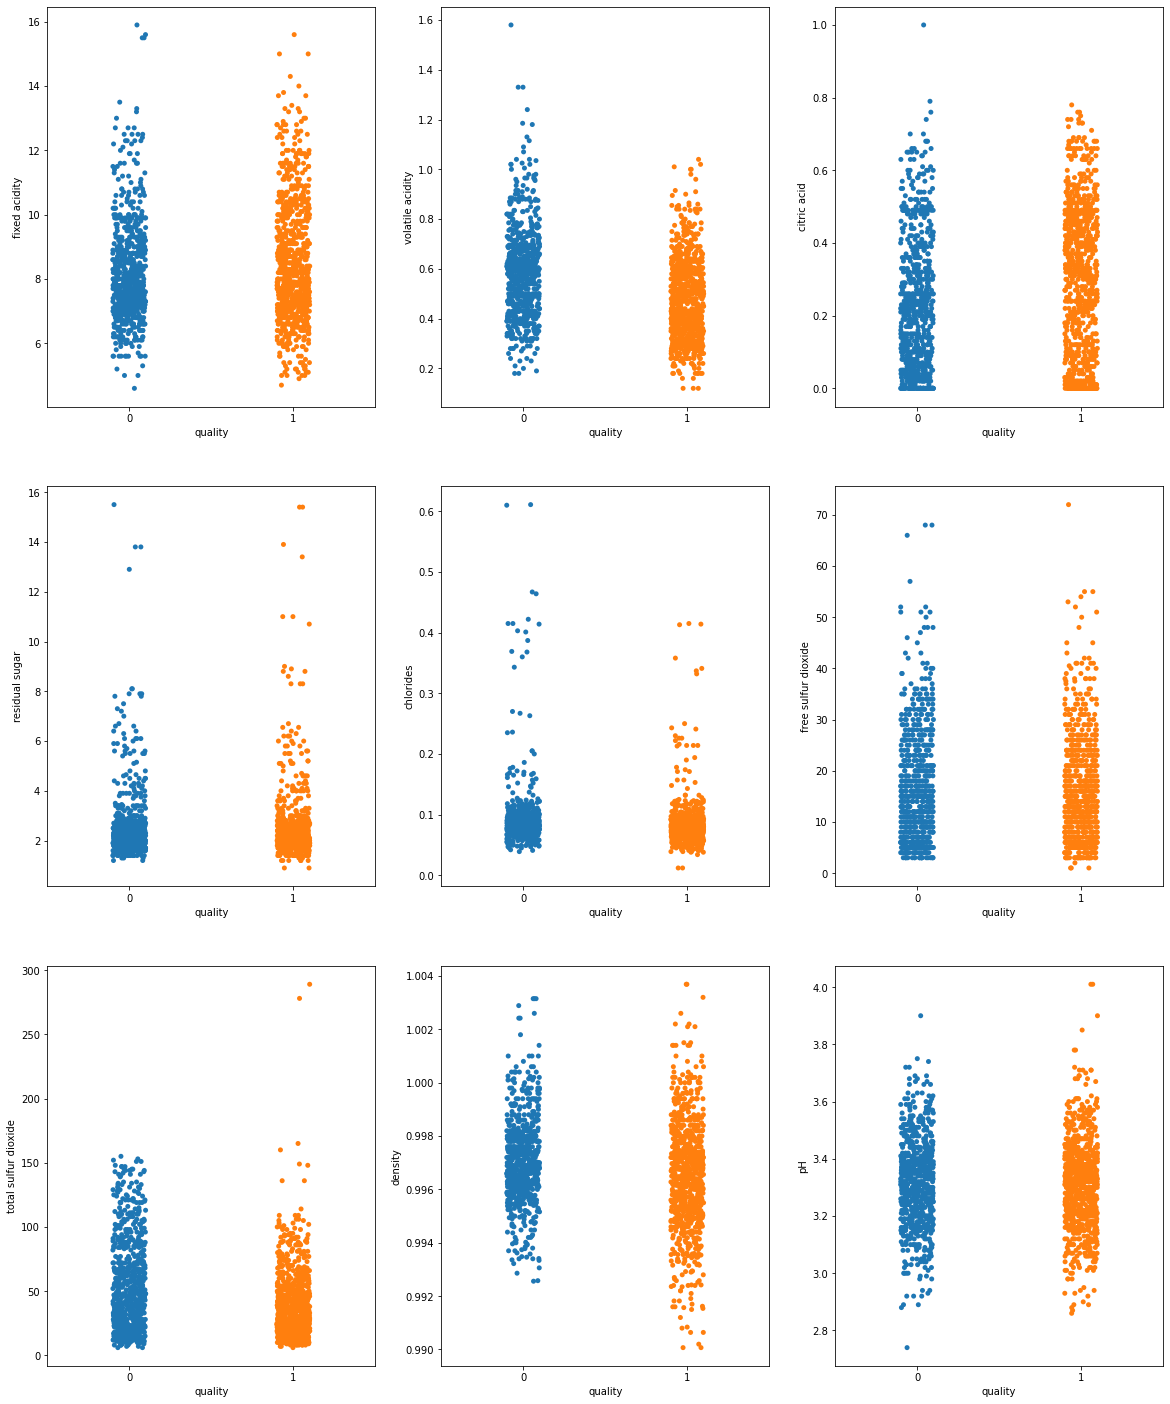

In [17]:
plt.figure(figsize=(20,25))
fignumber = 1

for column in x:
    if fignumber <= 9:
        ax = plt.subplot(3,3,fignumber)
        sns.stripplot(y,x[column])
        
    fignumber +=1
plt.show()

In [18]:
# Checking SKewness

x.skew().sort_values(ascending = False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

We can see the skewness in some columns of our dataset. we will remove the skewness using power_transform function.

In [19]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

In [20]:
pd.DataFrame(x_new).skew().sort_values(ascending = False)

10    0.112372
2     0.017788
9     0.009985
1     0.003099
0     0.002529
8    -0.002823
6    -0.003752
7    -0.005054
5    -0.009948
3    -0.015715
4    -0.151304
dtype: float64

In [21]:
x = pd.DataFrame(x_new, columns = x.columns)

In [22]:
x.skew().sort_values(ascending = False)

alcohol                 0.112372
citric acid             0.017788
sulphates               0.009985
volatile acidity        0.003099
fixed acidity           0.002529
pH                     -0.002823
total sulfur dioxide   -0.003752
density                -0.005054
free sulfur dioxide    -0.009948
residual sugar         -0.015715
chlorides              -0.151304
dtype: float64

In [23]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed. Now, we can proceed ahead for furthur steps

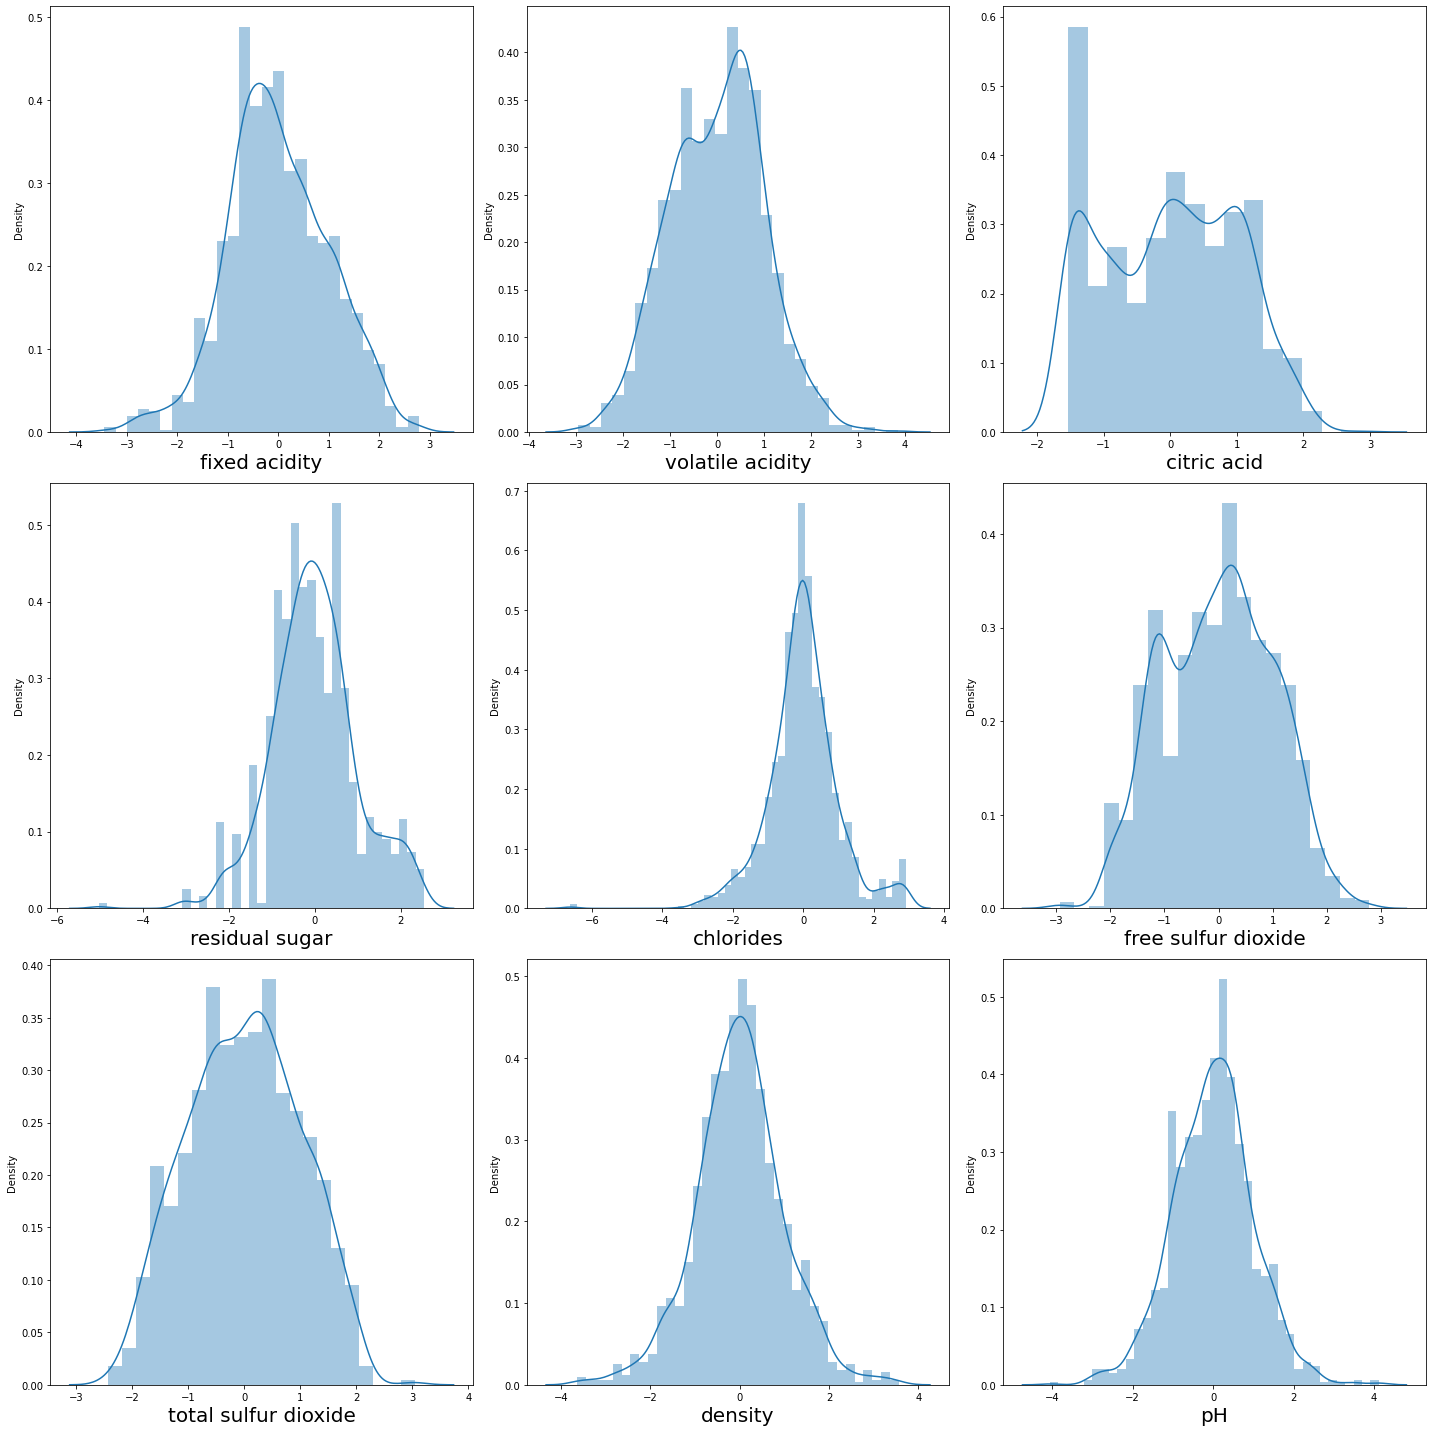

In [24]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

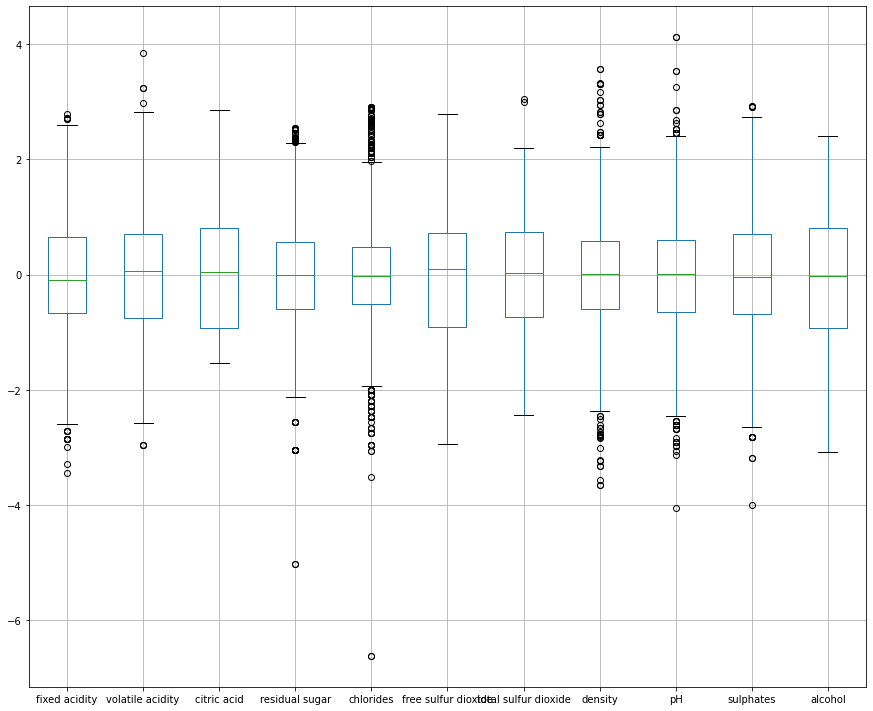

In [25]:
# checking Outliers

x.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [26]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
fixed acidity            True
volatile acidity        False
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                  True
dtype: bool
****************************************
Low Side Outliers Present
fixed acidity           False
volatile acidity         True
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide      True
total sulfur dioxide     True
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


There are outliers present in most of the columns, therefore we need to remove outliers before proceeding furthur.

 - Features having outliers in High Side are: 1. volatile_acidity, 2. total_sulfur_oxide, 3. density, 4. pH

 - Features having outliers in Low side are: 1. fixed_acidity, 2. reidual_sugar, 3.chlorides, 4. density, 5.pH, 6.sulphates, 7.alcohol

In [27]:
x.rename(columns = {'fixed acidity':'fixed_acidity',
                   'volatile acidity':'volatile_acidity',
                   'citric acid':'citric_acid',
                   'residual sugar':'residual_sugar',
                   'free sulfur dioxide':'free_sulfur_dioxide',
                   'total sulfur dioxide':'total_sulfur_dioxide'}, inplace = True)

x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025


In [28]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [29]:
volatile_acidity_high = q3.volatile_acidity + (1.5 * iqr.volatile_acidity)

# Check the Indexes which have higher values

index1 = np.where(x['volatile_acidity']> volatile_acidity_high)

x = x.drop(x['volatile_acidity'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1595, 11)
(1595,)


In [30]:
total_sulfur_dioxide_high = q3.total_sulfur_dioxide + (1.5 * iqr.total_sulfur_dioxide)

# Check the Indexes which have higher values

index1 = np.where(x['total_sulfur_dioxide']> total_sulfur_dioxide_high)

x = x.drop(x['total_sulfur_dioxide'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1593, 11)
(1593,)


In [31]:
density_high = q3.density + (1.5 * iqr.density)

# Check the Indexes which have higher values

index1 = np.where(x['density']> density_high)

x = x.drop(x['density'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1569, 11)
(1569,)


In [32]:
pH_high = q3.pH + (1.5 * iqr.pH)

# Check the Indexes which have higher values

index1 = np.where(x['pH']> pH_high)

x = x.drop(x['pH'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1553, 11)
(1553,)


In [33]:
density_low = q1.density - (1.5 * iqr.density)

# Check the Indexes which have higher values

index1 = np.where(x['density']< density_low)

x = x.drop(x['density'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1535, 11)
(1535,)


In [34]:
pH_low = q1.pH - (1.5 * iqr.pH)

# Check the Indexes which have higher values

index1 = np.where(x['pH']< pH_low)

x = x.drop(x['pH'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1519, 11)
(1519,)


In [35]:
fixed_acidity_low = q1.fixed_acidity - (1.5 * iqr.fixed_acidity)

# Check the Indexes which have higher values

index1 = np.where(x['fixed_acidity']< fixed_acidity_low)

x = x.drop(x['fixed_acidity'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1517, 11)
(1517,)


In [36]:
residual_sugar_low = q1.residual_sugar - (1.5 * iqr.residual_sugar)

# Check the Indexes which have higher values

index1 = np.where(x['residual_sugar']< residual_sugar_low)

x = x.drop(x['residual_sugar'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1507, 11)
(1507,)


In [37]:
chlorides_low = q1.chlorides - (1.5 * iqr.chlorides)

# Check the Indexes which have higher values

index1 = np.where(x['chlorides']< chlorides_low)

x = x.drop(x['chlorides'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1478, 11)
(1478,)


In [38]:
sulphates_low = q1.sulphates - (1.5 * iqr.sulphates)

# Check the Indexes which have higher values

index1 = np.where(x['sulphates']< sulphates_low)

x = x.drop(x['sulphates'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1471, 11)
(1471,)


In [39]:
alcohol_low = q1.alcohol - (1.5 * iqr.alcohol)

# Check the Indexes which have higher values

index1 = np.where(x['alcohol']< alcohol_low)

x = x.drop(x['alcohol'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(1471, 11)
(1471,)


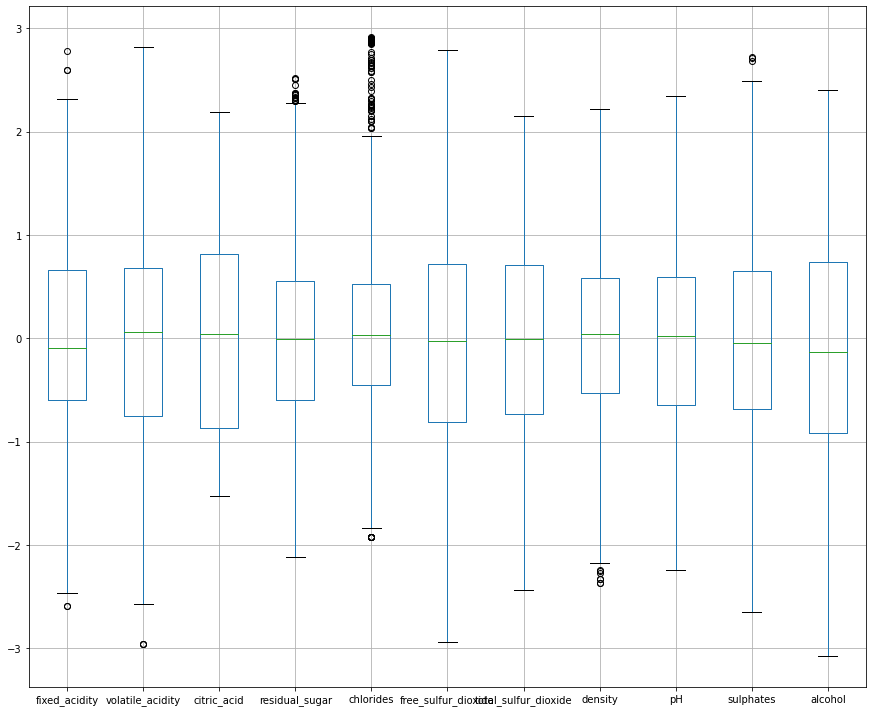

In [40]:
# checking Outliers

x.iloc[:,:].boxplot(figsize = (15,15))
plt.subplots_adjust(bottom = 0.25)
plt.show()

In [41]:
print((np.abs(zscore(x))<3).all())

print('****************************************')

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

fixed_acidity           False
volatile_acidity        False
citric_acid              True
residual_sugar           True
chlorides               False
free_sulfur_dioxide      True
total_sulfur_dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                 False
dtype: bool
****************************************
High Side Outliers present
fixed_acidity           False
volatile_acidity         True
citric_acid              True
residual_sugar           True
chlorides               False
free_sulfur_dioxide      True
total_sulfur_dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
dtype: bool
****************************************
Low Side Outliers Present
fixed_acidity            True
volatile_acidity        False
citric_acid              True
residual_sugar           True
chlorides                True
free_sulfur_dioxide      True
t

Still there are some outliers present in the dataset.

In [42]:
#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [43]:
fixed_acidity_high = q3.fixed_acidity + (1.5 * iqr.fixed_acidity)

# Check the Indexes which have higher values

index2 = np.where(x['fixed_acidity']> fixed_acidity_high)

x = x.drop(x['fixed_acidity'].index[index2])

y = y.drop(y.index[index2])

print(x.shape)
print(y.shape)

(1468, 11)
(1468,)


In [44]:
chlorides_high = q3.chlorides + (1.5 * iqr.chlorides)

# Check the Indexes which have higher values

index2 = np.where(x['chlorides']> chlorides_high)

x = x.drop(x['chlorides'].index[index2])

y = y.drop(y.index[index2])

print(x.shape)
print(y.shape)

(1408, 11)
(1408,)


In [45]:
alcohol_low = q1.alcohol - (1.5 * iqr.alcohol)

# Check the Indexes which have higher values

index2 = np.where(x['alcohol']< alcohol_low)

x = x.drop(x['alcohol'].index[index2])

y = y.drop(y.index[index2])

print(x.shape)
print(y.shape)

(1408, 11)
(1408,)


In [46]:
volatile_acidity_low = q1.volatile_acidity - (1.5 * iqr.volatile_acidity)

# Check the Indexes which have higher values

index2 = np.where(x['volatile_acidity']< volatile_acidity_low)

x = x.drop(x['volatile_acidity'].index[index2])

y = y.drop(y.index[index2])

print(x.shape)
print(y.shape)

(1405, 11)
(1405,)


In [47]:
print((np.abs(zscore(x))<3).all())

print('****************************************')

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

fixed_acidity            True
volatile_acidity         True
citric_acid              True
residual_sugar           True
chlorides                True
free_sulfur_dioxide     False
total_sulfur_dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                  True
dtype: bool
****************************************
High Side Outliers present
fixed_acidity           True
volatile_acidity        True
citric_acid             True
residual_sugar          True
chlorides               True
free_sulfur_dioxide     True
total_sulfur_dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
dtype: bool
****************************************
Low Side Outliers Present
fixed_acidity            True
volatile_acidity         True
citric_acid              True
residual_sugar           True
chlorides                True
free_sulfur_dioxide     False
total_sulfur

In [48]:
#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [49]:
free_sulfur_dioxide_low = q1.free_sulfur_dioxide - (1.5 * iqr.free_sulfur_dioxide)

# Check the Indexes which have higher values

index3 = np.where(x['free_sulfur_dioxide']< free_sulfur_dioxide_low)

x = x.drop(x['free_sulfur_dioxide'].index[index3])

y = y.drop(y.index[index3])

print(x.shape)
print(y.shape)

(1403, 11)
(1403,)


In [50]:
print((np.abs(zscore(x))<3).all())

fixed_acidity           True
volatile_acidity        True
citric_acid             True
residual_sugar          True
chlorides               True
free_sulfur_dioxide     True
total_sulfur_dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
dtype: bool


Now the outliers are removed. we can proceed furthur.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,5.935574,fixed_acidity
1,2.019492,volatile_acidity
2,3.111640,citric_acid
3,1.734640,residual_sugar
4,1.220325,chlorides
5,3.092859,free_sulfur_dioxide
6,3.571208,total_sulfur_dioxide
7,5.042701,density
8,2.856924,pH
9,1.383393,sulphates


As VIF value is below 10 for our Dataset. We can assume that there is no multicollinearity present in the data.

In [53]:
# Finding the Best Random State

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('accuracy score', acc, 'random_state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.7065527065527065 random_state 1
accuracy score 0.7065527065527065 random_state 1
accuracy score 0.7037037037037037 random_state 2
accuracy score 0.7464387464387464 random_state 3
accuracy score 0.7464387464387464 random_state 3
accuracy score 0.7407407407407407 random_state 4
accuracy score 0.7492877492877493 random_state 5
accuracy score 0.7492877492877493 random_state 5
accuracy score 0.7464387464387464 random_state 6
accuracy score 0.7207977207977208 random_state 7
accuracy score 0.7378917378917379 random_state 8
accuracy score 0.7207977207977208 random_state 9
accuracy score 0.7407407407407407 random_state 10
accuracy score 0.7236467236467237 random_state 11
accuracy score 0.7521367521367521 random_state 12
accuracy score 0.7521367521367521 random_state 12
accuracy score 0.7350427350427351 random_state 13
accuracy score 0.8005698005698005 random_state 14
accuracy score 0.8005698005698005 random_state 14
accuracy score 0.7635327635327636 random_state 15
accuracy sco

accuracy score 0.7350427350427351 random_state 168
accuracy score 0.7407407407407407 random_state 169
accuracy score 0.7435897435897436 random_state 170
accuracy score 0.7122507122507122 random_state 171
accuracy score 0.7635327635327636 random_state 172
accuracy score 0.7407407407407407 random_state 173
accuracy score 0.7321937321937322 random_state 174
accuracy score 0.7293447293447294 random_state 175
accuracy score 0.7407407407407407 random_state 176
accuracy score 0.7521367521367521 random_state 177
accuracy score 0.7549857549857549 random_state 178
accuracy score 0.7521367521367521 random_state 179
accuracy score 0.7236467236467237 random_state 180
accuracy score 0.7777777777777778 random_state 181
accuracy score 0.7435897435897436 random_state 182
accuracy score 0.7464387464387464 random_state 183
accuracy score 0.7407407407407407 random_state 184
accuracy score 0.7264957264957265 random_state 185
accuracy score 0.7350427350427351 random_state 186
accuracy score 0.74643874643874

In [54]:
print('Best Accuracy is', maxAccu, 'on Random_state', maxRS)

Best Accuracy is 0.8005698005698005 on Random_state 14


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 14)

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1052, 11)
(1052,)
(351, 11)
(351,)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [60]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8005698005698005
[[126  36]
 [ 34 155]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       162
           1       0.81      0.82      0.82       189

    accuracy                           0.80       351
   macro avg       0.80      0.80      0.80       351
weighted avg       0.80      0.80      0.80       351



In [61]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7806267806267806
[[122  40]
 [ 37 152]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       162
           1       0.79      0.80      0.80       189

    accuracy                           0.78       351
   macro avg       0.78      0.78      0.78       351
weighted avg       0.78      0.78      0.78       351



In [62]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7606837606837606
[[128  34]
 [ 50 139]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       162
           1       0.80      0.74      0.77       189

    accuracy                           0.76       351
   macro avg       0.76      0.76      0.76       351
weighted avg       0.76      0.76      0.76       351



In [63]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8376068376068376
[[143  19]
 [ 38 151]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       162
           1       0.89      0.80      0.84       189

    accuracy                           0.84       351
   macro avg       0.84      0.84      0.84       351
weighted avg       0.84      0.84      0.84       351



In [64]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred =svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7834757834757835
[[133  29]
 [ 47 142]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       162
           1       0.83      0.75      0.79       189

    accuracy                           0.78       351
   macro avg       0.78      0.79      0.78       351
weighted avg       0.79      0.78      0.78       351



Random Forest Classifier has the best accuracy amongst all the models. Let's check cross validation score for RandomForestClassifier.

In [65]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv = 7)

print('Cross Validation Score of Random Forest Model is: ', scr.mean())

Cross Validation Score of Random Forest Model is:  0.7228251599147122


In [66]:
scr

array([0.64179104, 0.75621891, 0.64676617, 0.85      , 0.705     ,
       0.725     , 0.735     ])

In [67]:
scr2 = cross_val_score(rf, x, y, cv = 5)

print('Cross Validation Score of Random Forest Model is: ', scr2.mean())

Cross Validation Score of Random Forest Model is:  0.7227249618708693


In [69]:
# HyperParameter Tuning

param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [4,5,6,7,8,9, 10, 15],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'n_estimators': np.arange(2,21,2)}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', rf_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 18}

conf_mat ==> 
 [[137  25]
 [ 28 161]]

Accuracy rf Normal ==> 
 0.8490028490028491


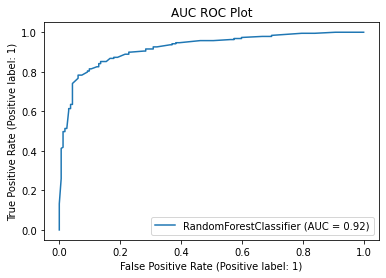

In [70]:
# auc roc plot

plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

Final Accuracy is 84.9% and AUC score is 92%, which is very good.

In [71]:
# Saving the Model

import joblib
joblib.dump(clf, "Red_Wine_Quality.pkl")

['Red_Wine_Quality.pkl']